In [24]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn import metrics
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from mlxtend.plotting import plot_decision_regions
import warnings
warnings.filterwarnings("ignore")

In [5]:
test_tmp = pd.read_csv("C:/Users/chopp/Downloads/SalaryData_Test(1) (1).csv")
train_tmp = pd.read_csv("C:/Users/chopp/Downloads/SalaryData_Train(1).csv")


In [7]:
df_tmp = test_tmp.add(train_tmp)
test = test_tmp.copy()
train = train_tmp.copy()
test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [8]:
train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [9]:
str_c = ["workclass","education","maritalstatus","occupation","relationship","race","sex","native"]
number = LabelEncoder()

In [10]:
for i in str_c:
    train[i]= number.fit_transform(train[i])
    test[i]=number.fit_transform(test[i])

In [11]:
test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,2,1,7,4,6,3,2,1,0,0,40,37,<=50K
1,38,2,11,9,2,4,0,4,1,0,0,50,37,<=50K
2,28,1,7,12,2,10,0,4,1,0,0,40,37,>50K
3,44,2,15,10,2,6,0,2,1,7688,0,40,37,>50K
4,34,2,0,6,4,7,1,4,1,0,0,30,37,<=50K


In [12]:
train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,<=50K
1,50,4,9,13,2,3,0,4,1,0,0,13,37,<=50K
2,38,2,11,9,0,5,1,4,1,0,0,40,37,<=50K
3,53,2,1,7,2,5,0,2,1,0,0,40,37,<=50K
4,28,2,9,13,2,9,5,2,0,0,0,40,4,<=50K


In [16]:

train = train.replace({'Salary': mapping})
test = test.replace({'Salary': mapping})
df = train.add(test) 
df1 = df.copy()
df1.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,64.0,7.0,10.0,20.0,8.0,6.0,4.0,6.0,2.0,2174.0,0.0,80.0,74.0,4.0
1,88.0,6.0,20.0,22.0,4.0,7.0,0.0,8.0,2.0,0.0,0.0,63.0,74.0,4.0
2,66.0,3.0,18.0,21.0,2.0,15.0,1.0,8.0,2.0,0.0,0.0,80.0,74.0,3.0
3,97.0,4.0,16.0,17.0,4.0,11.0,0.0,4.0,2.0,7688.0,0.0,80.0,74.0,3.0
4,62.0,4.0,9.0,19.0,6.0,16.0,6.0,6.0,1.0,0.0,0.0,70.0,41.0,4.0


In [17]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
age,15060.0,77.195750,18.851834,34.0,63.0,76.0,90.0,155.0
workclass,15060.0,4.418858,1.361920,0.0,4.0,4.0,5.0,10.0
education,15060.0,20.640571,5.352129,0.0,18.0,22.0,24.0,30.0
educationno,15060.0,20.242829,3.606840,2.0,18.0,20.0,23.0,32.0
maritalstatus,15060.0,5.173440,2.105886,0.0,4.0,6.0,6.0,12.0
occupation,15060.0,11.944887,5.705434,0.0,8.0,12.0,16.0,26.0
relationship,15060.0,2.825166,2.255990,0.0,1.0,3.0,4.0,10.0
race,15060.0,7.367198,1.170373,0.0,7.0,8.0,8.0,8.0
sex,15060.0,1.350066,0.665049,0.0,1.0,1.0,2.0,2.0
capitalgain,15060.0,2197.144887,10668.177924,0.0,0.0,0.0,0.0,199998.0


In [18]:
df1.isnull().sum()

age              15101
workclass        15101
education        15101
educationno      15101
maritalstatus    15101
occupation       15101
relationship     15101
race             15101
sex              15101
capitalgain      15101
capitalloss      15101
hoursperweek     15101
native           15101
Salary           15101
dtype: int64

<Axes: >

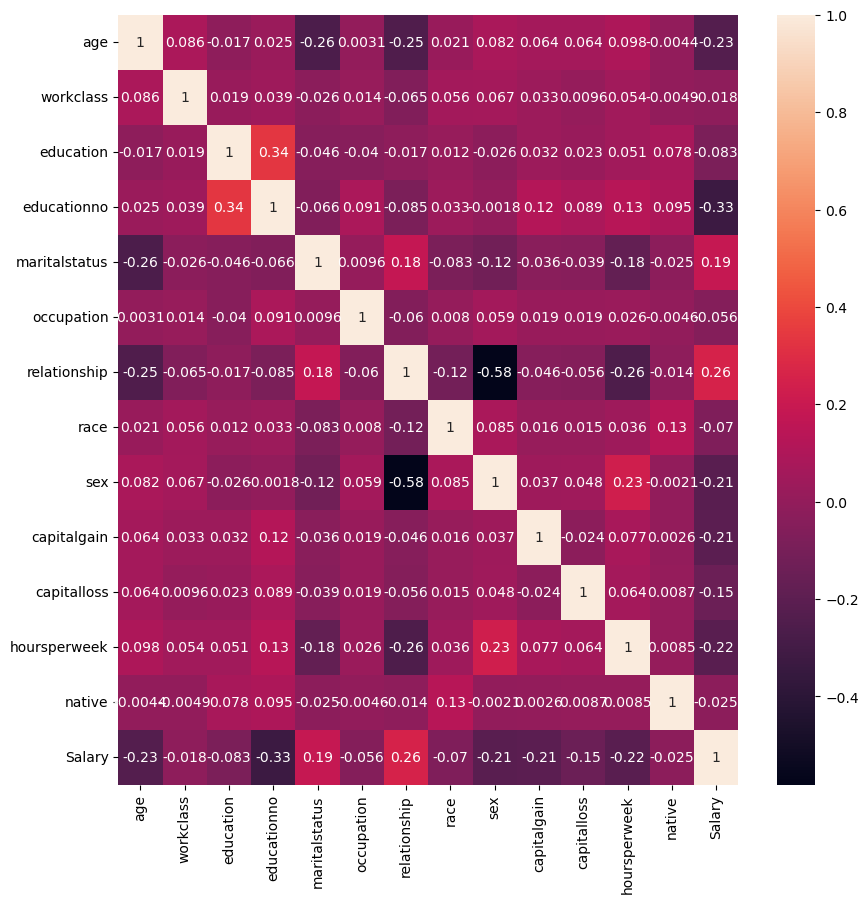

In [19]:
corr = df1.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True)

Skew: -0.21499746800554054
Kurtosis: 0.302197257705175


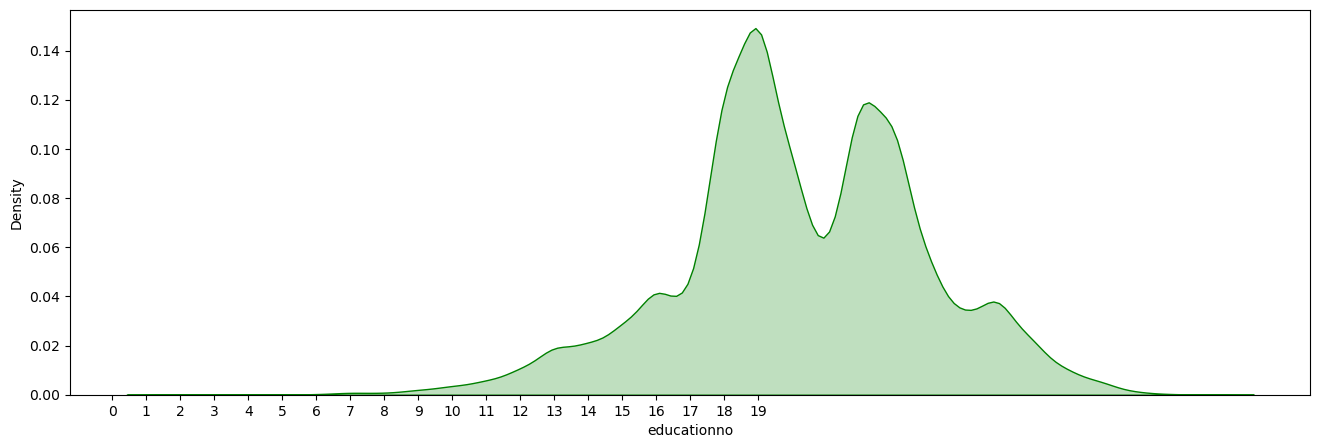

In [25]:
plt.rcParams["figure.figsize"] = 9,5
plt.figure(figsize=(16,5))
print("Skew: {}".format(df1['educationno'].skew()))
print("Kurtosis: {}".format(df1['educationno'].kurtosis()))
ax = sns.kdeplot(df1['educationno'],shade=True,color='g')
plt.xticks([i for i in range(0,20,1)])
plt.show()

ValueError: num must be an integer with 1 <= num <= 4, not 5

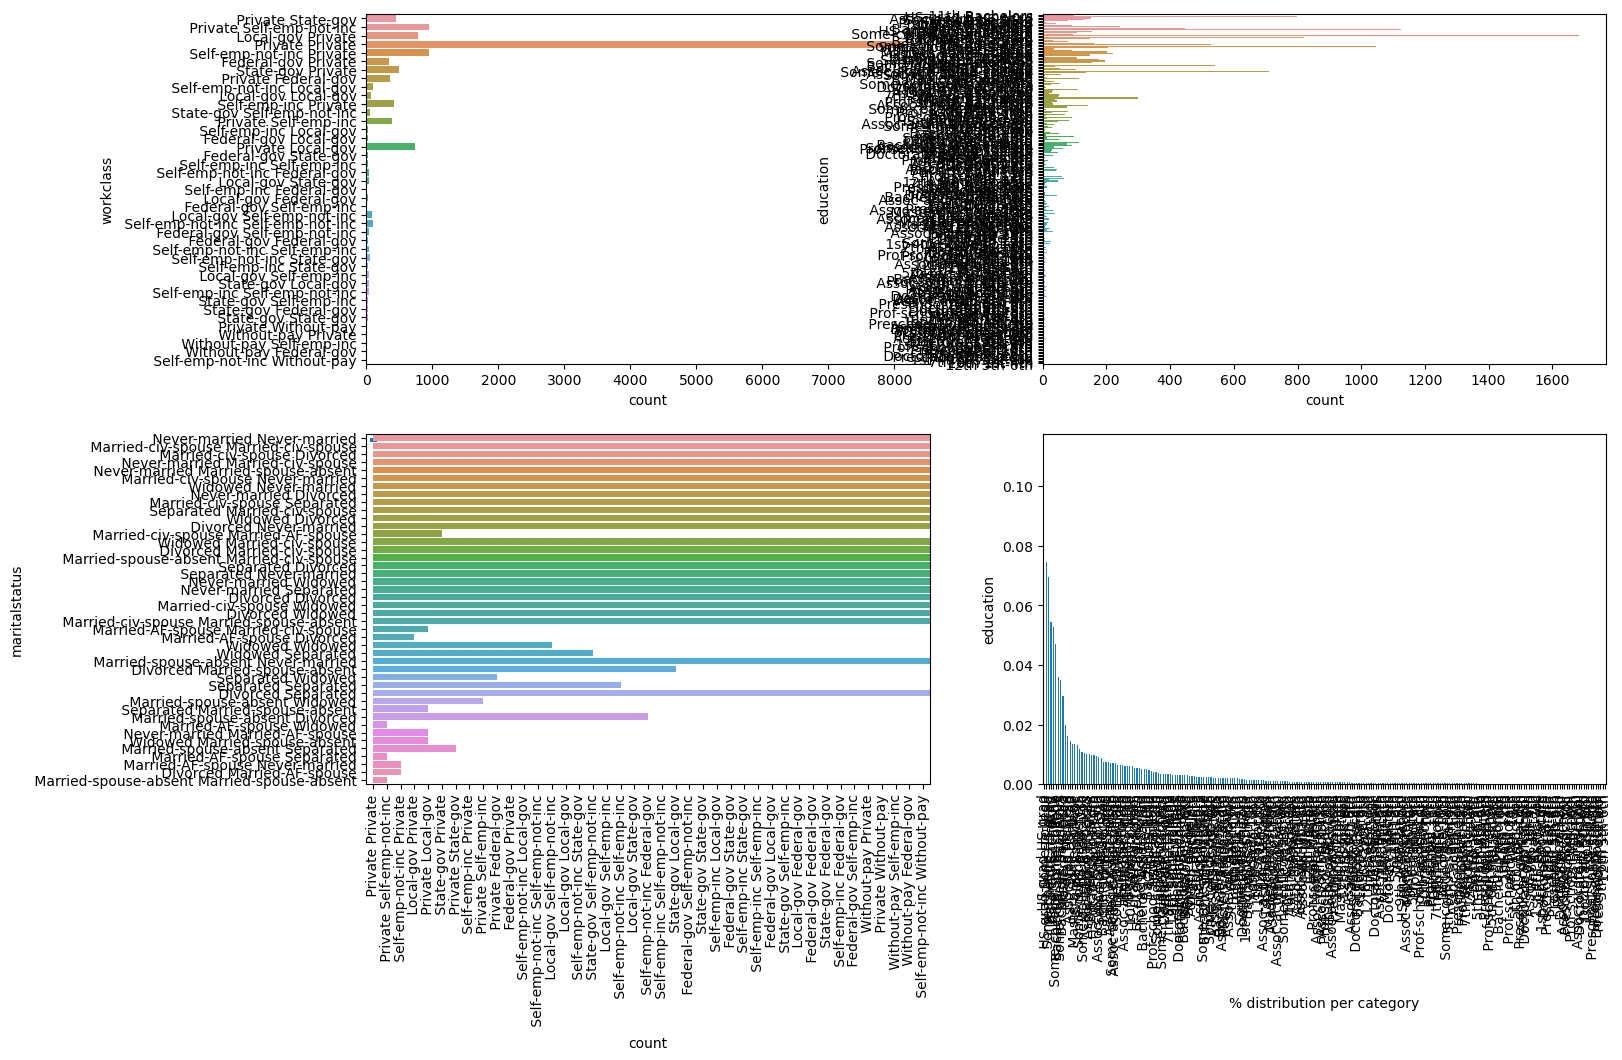

In [26]:
dfa = df_tmp[df_tmp.columns[0:13]]
obj_colum = dfa.select_dtypes(include='object').columns.tolist()
plt.figure(figsize=(16,10))
for i,col in enumerate(obj_colum,1):
    plt.subplot(2,2,i)
    sns.countplot(data=dfa,y=col)
    plt.subplot(2,2,i+2)
    df_tmp[col].value_counts(normalize=True).plot.bar()
    plt.ylabel(col)
    plt.xlabel('% distribution per category')
plt.tight_layout()
plt.show()  

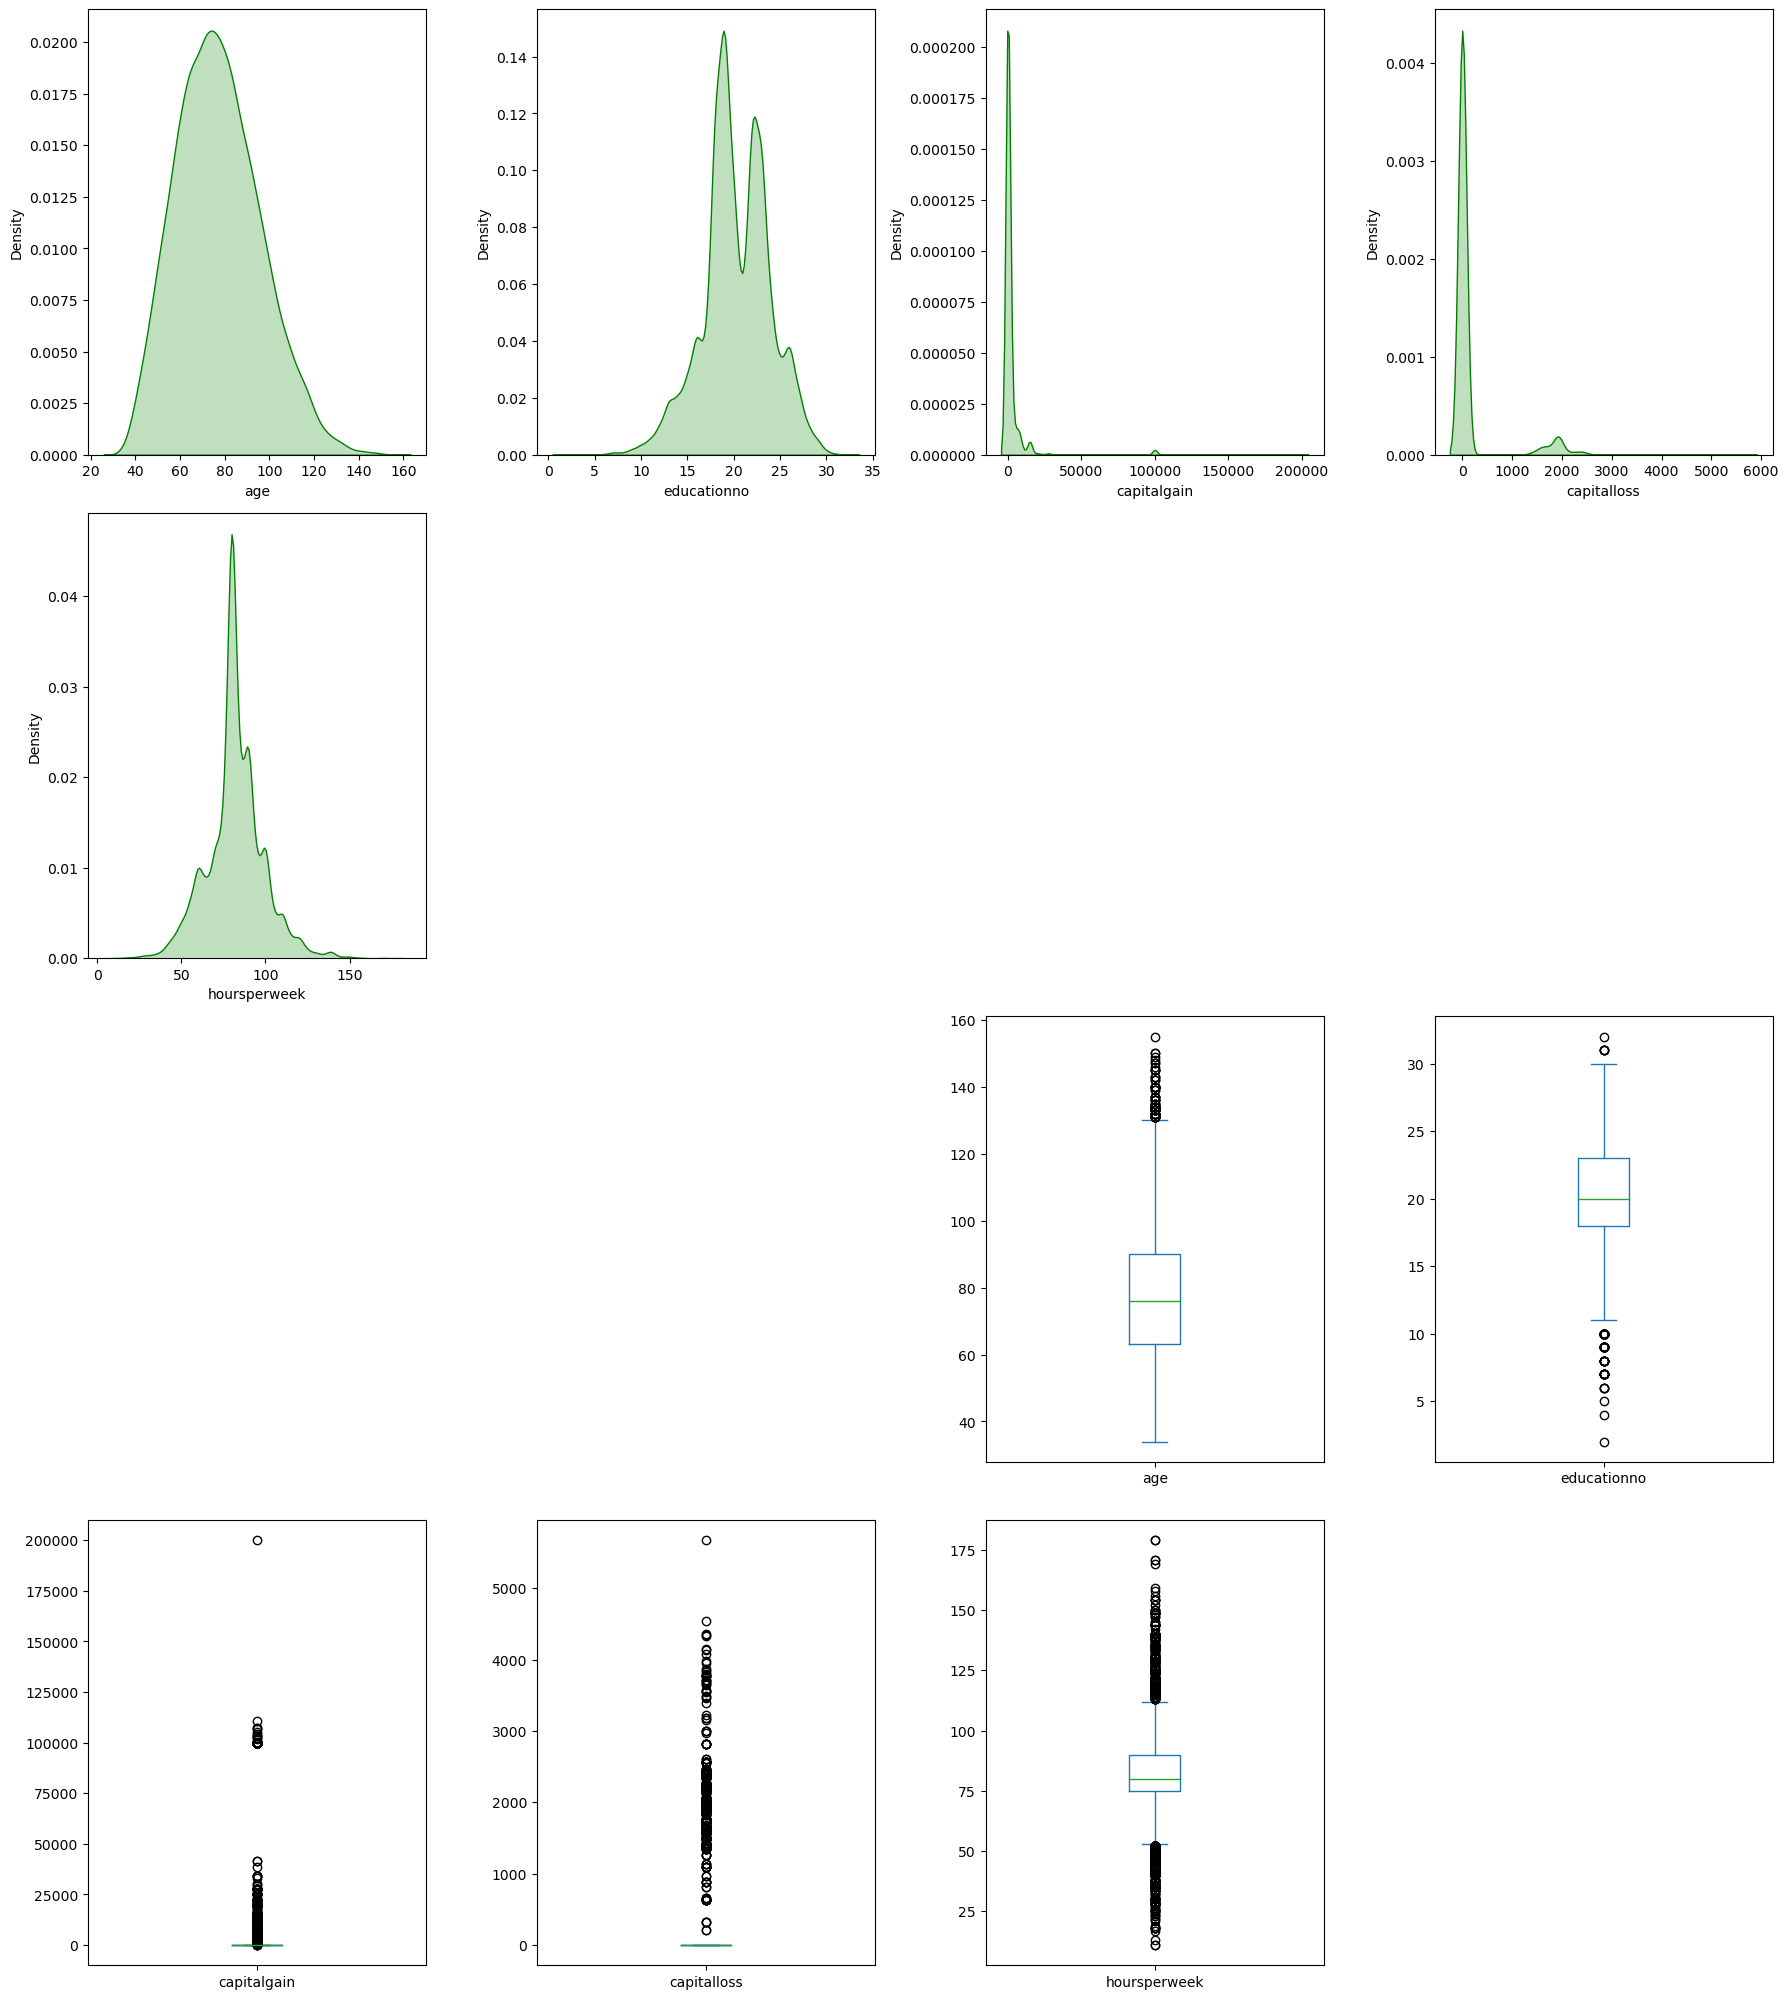

,age,educationno,capitalgain,capitalloss,hoursperweek
skewness,0.388441,-0.214997,8.419641,3.180827,0.230470
kurtosis,-0.092704,0.302197,77.619545,9.659017,1.602872


In [27]:
num_columns = dfa.select_dtypes(exclude='object').columns.tolist()
plt.figure(figsize=(18,40))
for i,col in enumerate(num_columns,1):
    plt.subplot(8,4,i)
    sns.kdeplot(df[col],color='g',shade=True)
    plt.subplot(8,4,i+10)
    df[col].plot.box()
plt.tight_layout() 
plt.show()
num_data = df[num_columns]
pd.DataFrame(data=[num_data.skew(),num_data.kurtosis()],index=['skewness','kurtosis'])

In [28]:
col = df1.columns
x_train = train[col[0:13]]
y_train = train[col[13]]
x_test = test[col[0:13]]
y_test = test[col[13]]

In [29]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)
x_train = norm_func(x_train)
x_test =  norm_func(x_test)

In [30]:

x_train = norm_func(x_train)
x_test =  norm_func(x_test)

In [31]:
model_linear = SVC(kernel = "linear")
model_linear.fit(x_train,y_train)
pred_test_linear = model_linear.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, pred_test_linear))

Accuracy: 0.8097609561752988


In [32]:

model_poly = SVC(kernel = "poly")
model_poly.fit(x_train,y_train)
pred_test_poly = model_poly.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, pred_test_poly))

Accuracy: 0.8434926958831341


In [33]:

model_rbf = SVC(kernel = "rbf")
model_rbf.fit(x_train,y_train)
pred_test_rbf = model_rbf.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, pred_test_rbf))

Accuracy: 0.8432934926958832


In [34]:

model_sigmoid = SVC(kernel = "sigmoid")
model_sigmoid.fit(x_train,y_train)
pred_test_sigmoid = model_sigmoid.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, pred_test_sigmoid))

Accuracy: 0.5768924302788845
